In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_finalized.csv')
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,income_category,loan_category,Interest_Rate_Category(%),age_group,employment_duration_bucket,cred_hist_bucket
0,2.0,21,9600,OWN,5.0,EDUCATION,A,1000,11.14,1,NEW,2,NO DEFAULT,"$0 - $20,000","$0 - $5,000",9.01 - 13,18 - 24,6 - 10,0 - 5
1,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,5500,12.87,5,N,3,DEFAULT,"$0 - $20,000","$5,001 - $10,000",9.01 - 13,25 - 34,0 - 5,0 - 5
2,6.0,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5
3,10.0,21,10000,OWN,6.0,VENTURE,C,1600,14.74,1,N,3,DEFAULT,"$0 - $20,000","$0 - $5,000",13.01 - 17,18 - 24,6 - 10,0 - 5
4,12.0,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,N,2,DEFAULT,"$0 - $20,000","$0 - $5,000",5 - 9,18 - 24,0 - 5,0 - 5


# Age Distribution: This graph shows the age range of applicants and helps identify which age groups are most likely to apply for loans. 
### KDE (Kernel Density Estimate): The curvy line you see on top of the histogram is the KDE. This is a smoothed version of the histogram, which estimates the probability density function of the age variable. The KDE line shows where the data points are concentrated, providing a clearer view of the distribution's shape compared to the histogram alone.

C:\Users\amid1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


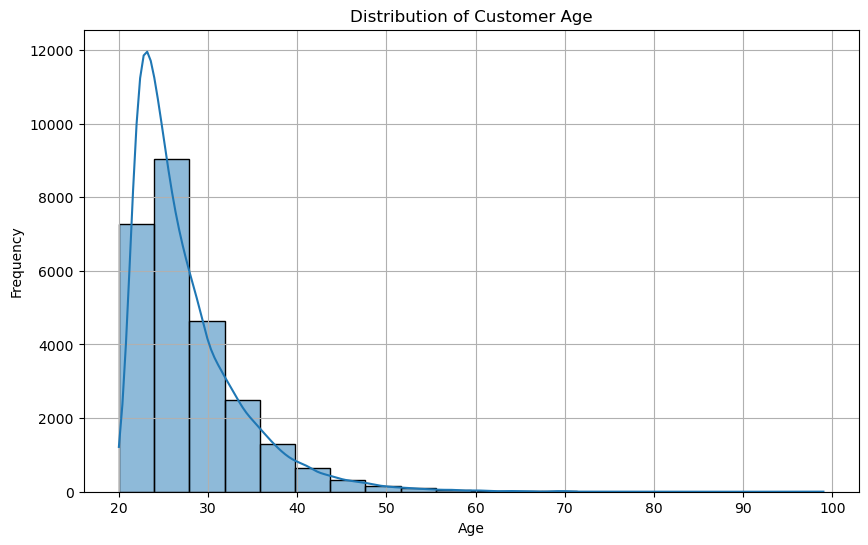

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['customer_age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Home Ownership vs Loan Acceptance: This count plot illustrates the relationship between home ownership and historical defaults, informing potential risk factors for loan acceptance.

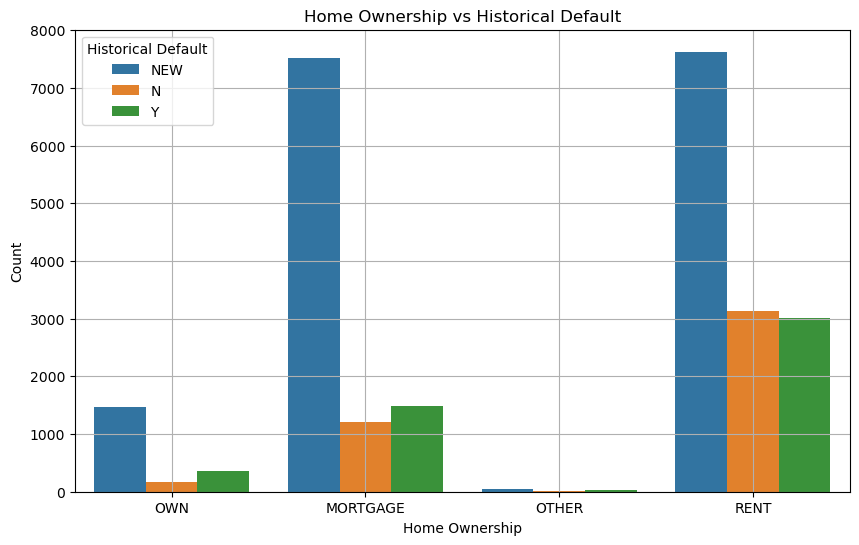

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=df, hue='historical_default')
plt.title('Home Ownership vs Historical Default')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Historical Default')
plt.grid()
plt.show()

# Age Group Proportions: The pie chart helps visualize the demographic spread of age groups, assisting in targeting specific segments.

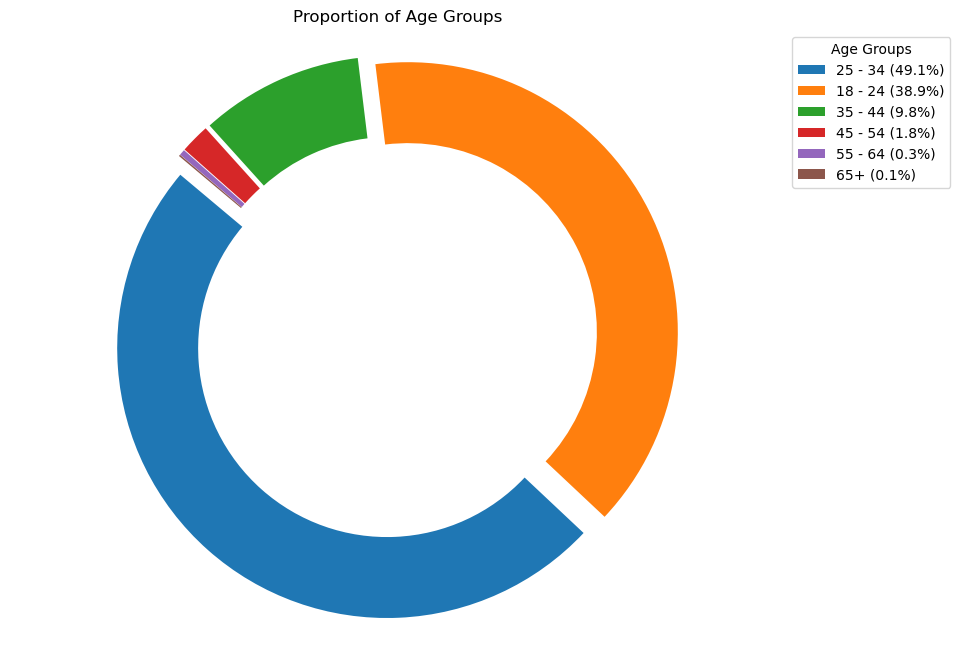

In [5]:
# Get counts for age groups
age_group_counts = df['age_group'].value_counts()

# Calculate percentages for the legend
percentages = age_group_counts / age_group_counts.sum() * 100
legend_labels = [f"{age_group} ({percent:.1f}%)" for age_group, percent in zip(age_group_counts.index, percentages)]

# Slight explosion for all slices
explode = [0.05] * len(age_group_counts)  # Adjust this value for more or less explosion

# Create a donut chart
plt.figure(figsize=(10, 8))
wedges, texts = plt.pie(age_group_counts, 
                         labels=None,  # Remove labels from the pie slices
                         startangle=140, 
                         explode=explode,  # Apply explosion
                         wedgeprops=dict(width=0.3))  # Adjust the width for the donut effect

plt.title('Proportion of Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with age groups and percentages
plt.legend(legend_labels, title="Age Groups", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

# Count of Loan Applicants by Income Category: This count plot provides insights into how many people fall into each income category, guiding the bank's loan policies.

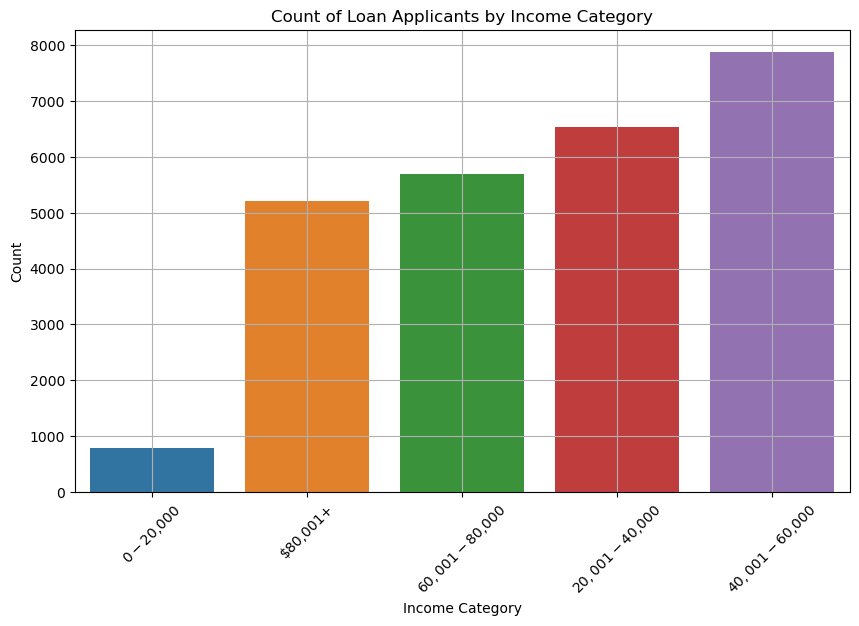

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='income_category', data=df)
plt.title('Count of Loan Applicants by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Employment Duration vs Historical Default: The stacked bar chart shows how the historical default rate varies with employment duration. A lower default rate among those with longer employment durations may indicate that job stability correlates with better loan repayment ability.

<Figure size 1000x600 with 0 Axes>

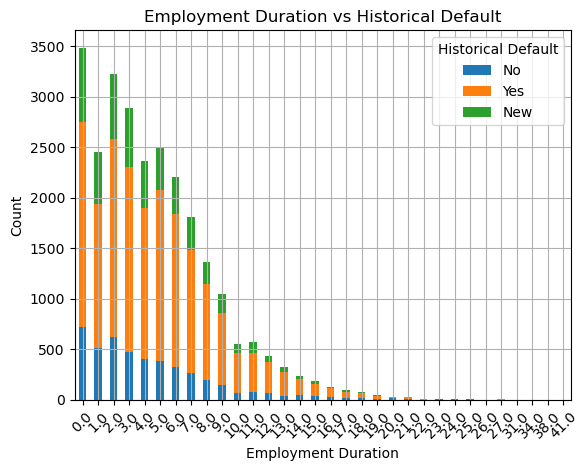

In [7]:
plt.figure(figsize=(10, 6))
employment_default_counts = df.groupby(['employment_duration', 'historical_default']).size().unstack()
employment_default_counts.plot(kind='bar', stacked=True)
plt.title('Employment Duration vs Historical Default')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Historical Default', labels=['No', 'Yes', 'New'])
plt.grid()
plt.show()